# Dog Breeds Analysis Report

This report provides a comprehensive analysis of various dog breeds based on attributes such as popularity, cost, intelligence, longevity, genetic ailments, and suitability for children. The dataset includes detailed information on 87 dog breeds, allowing us to explore these characteristics through a series of visualizations.

#### 1. Popularity Ranking vs. Score by Dog Type

This scatter plot illustrates the relationship between popularity ranking and score across different dog types. The plot reveals no clear correlation between popularity and score, suggesting that a breed's popularity does not necessarily align with its assigned score. Dog types are color-coded, providing a visual distinction among the categories.

#### 2. Average Lifetime Cost by Dog Type

The bar chart shows the average lifetime cost for each dog type. Working dogs tend to have the highest average lifetime costs, while toy dogs have the lowest. This visualization helps potential dog owners understand the financial implications of owning different types of dogs.

#### 3. Distribution of Lifespan by Dog Size

The box plot displays the distribution of lifespan across different dog sizes. Smaller dogs generally have longer lifespans compared to larger dogs. This pattern is consistent with the general understanding that smaller dog breeds often live longer than their larger counterparts.

#### 4. Top 10 Breeds by Intelligence Rank

This bar chart ranks the top 10 dog breeds by intelligence. Breeds such as Border Collie, Poodle, and German Shepherd are among the most intelligent. These breeds are known for their high trainability and cognitive abilities.

#### 5. Number of Genetic Ailments by Dog Size

The violin plot illustrates the number of genetic ailments associated with different dog sizes. Medium-sized dogs show a wider distribution in the number of genetic ailments, while small and large dogs tend to have more consistent numbers of genetic issues.

#### 6. Suitability for Children vs. Score for Kids

This box plot explores the relationship between the suitability for children and the score for kids. Breeds rated highly suitable for children (1) generally receive higher scores for kids, indicating they are better suited for family environments.

#### 7. Annual Food Cost by Dog Size

The bar chart shows the annual food cost for dogs of different sizes. As expected, larger dogs incur higher food costs annually compared to smaller dogs. This information is crucial for prospective dog owners when budgeting for pet expenses.

#### 8. Correlation Heatmap

The heatmap visualizes the correlation between various numerical attributes in the dataset. Notable correlations include a negative correlation between popularity ranking and intelligence rank, and a positive correlation between score for kids and suitability for children. These insights help identify relationships between different breed characteristics.

#### 9. Breed Intelligence Distribution

The histogram displays the distribution of intelligence percentages across breeds. Most breeds fall into the middle range of intelligence, with fewer breeds at the very high or very low ends of the spectrum.

#### 10. Grooming Frequency by Dog Type

The count plot shows the grooming frequency required for different dog types. Certain types, such as non-sporting and toy breeds, require more frequent grooming. Understanding grooming needs is important for prospective dog owners in terms of time and financial commitment.

### Conclusion

This analysis provides valuable insights into the characteristics, costs, and suitability of various dog breeds. By understanding these attributes, prospective dog owners can make informed decisions when selecting a breed that fits their lifestyle and preferences. The visualizations offer a clear and attractive way to comprehend the diverse aspects of dog breeds, aiding in responsible pet ownership.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("/kaggle/input/dog-breeds-ranking-best-to-worst/dogs-ranking-dataset.csv")

# Clean up the data: Convert columns to appropriate data types
data['$LIFETIME COST'] = data['$LIFETIME COST'].str.replace('[\$,]', '', regex=True).astype(float)
data['PURCHASE PRICE'] = data['PURCHASE PRICE'].str.replace('[\$,]', '', regex=True).astype(float)
data['FOOD COSTS PER YEAR'] = data['FOOD COSTS PER YEAR'].str.replace('[\$,]', '', regex=True).astype(float)
data['INTELLIGENCE %'] = data['INTELLIGENCE %'].str.rstrip('%').astype(float) / 100.0

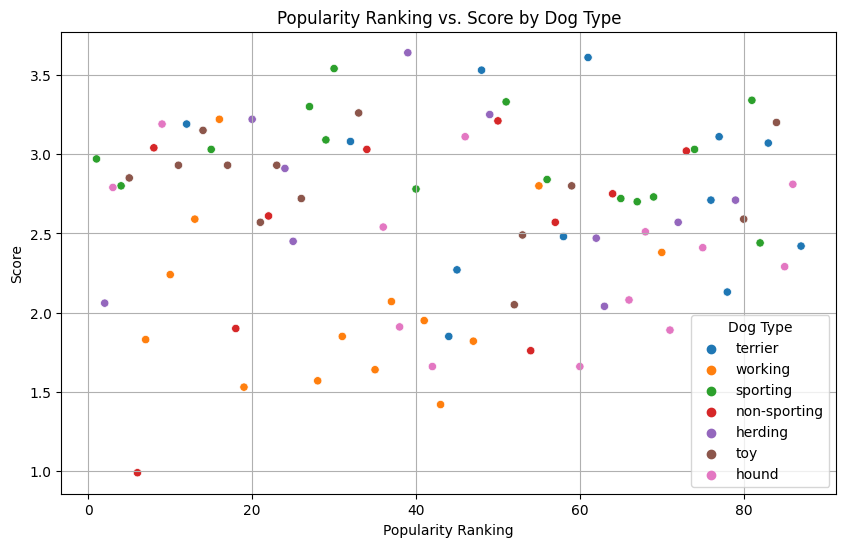

In [4]:
# 1. Popularity Ranking vs. Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='popularity ranking', y='score', hue='type', palette='tab10')
plt.title('Popularity Ranking vs. Score by Dog Type')
plt.xlabel('Popularity Ranking')
plt.ylabel('Score')
plt.legend(title='Dog Type')
plt.grid(True)
plt.show()

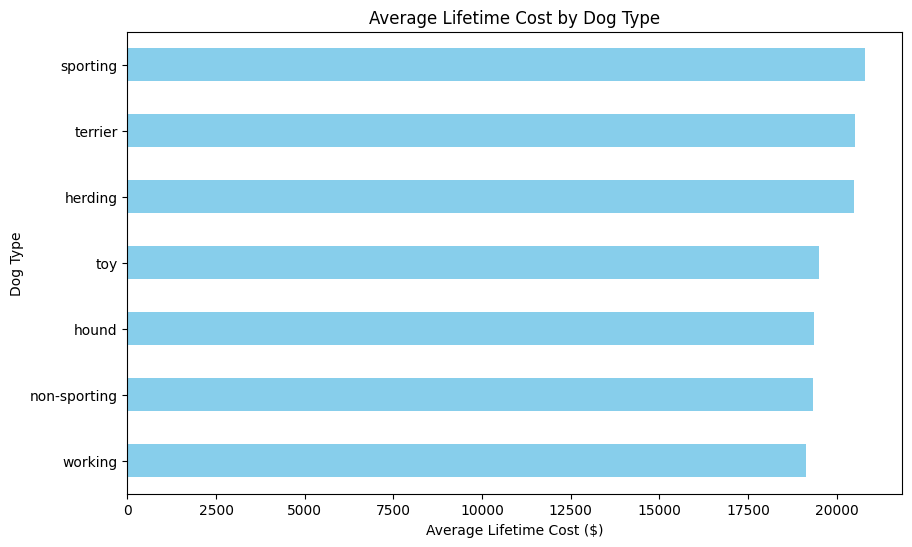

In [5]:
# 2. Average Lifetime Cost by Dog Type
plt.figure(figsize=(10, 6))
avg_lifetime_cost = data.groupby('type')['$LIFETIME COST'].mean().sort_values()
avg_lifetime_cost.plot(kind='barh', color='skyblue')
plt.title('Average Lifetime Cost by Dog Type')
plt.xlabel('Average Lifetime Cost ($)')
plt.ylabel('Dog Type')
plt.show()

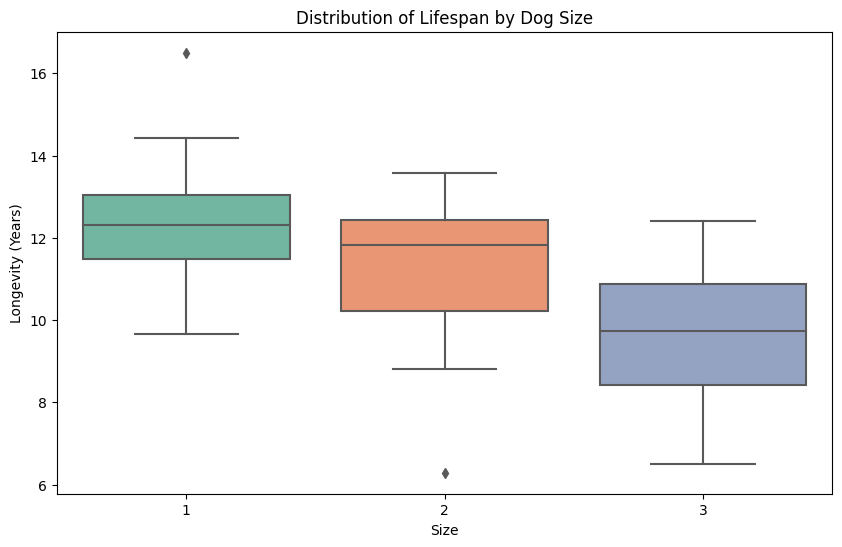

In [6]:
# 3. Distribution of Lifespan by Dog Size
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='size', y='LONGEVITY(YEARS)', palette='Set2')
plt.title('Distribution of Lifespan by Dog Size')
plt.xlabel('Size')
plt.ylabel('Longevity (Years)')
plt.show()

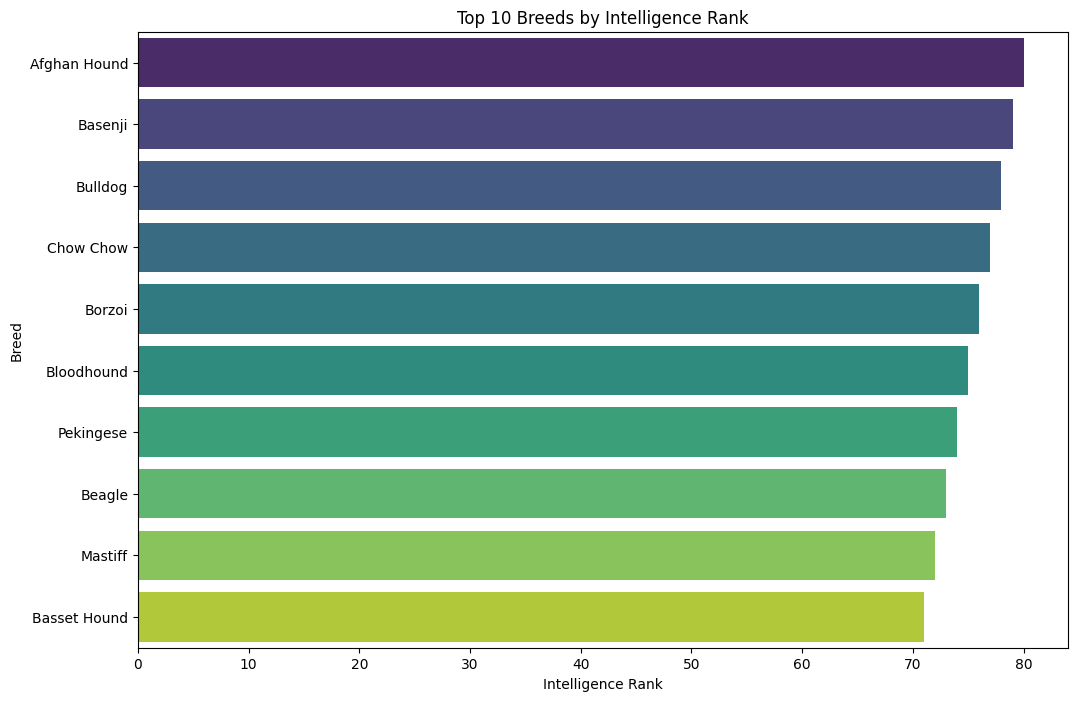

In [7]:
# 4. Top 10 Breeds by Intelligence Rank
top10_intelligent = data.nlargest(10, 'INTELLIGENCE RANK')
plt.figure(figsize=(12, 8))
sns.barplot(data=top10_intelligent, x='INTELLIGENCE RANK', y='Breed', palette='viridis')
plt.title('Top 10 Breeds by Intelligence Rank')
plt.xlabel('Intelligence Rank')
plt.ylabel('Breed')
plt.show()

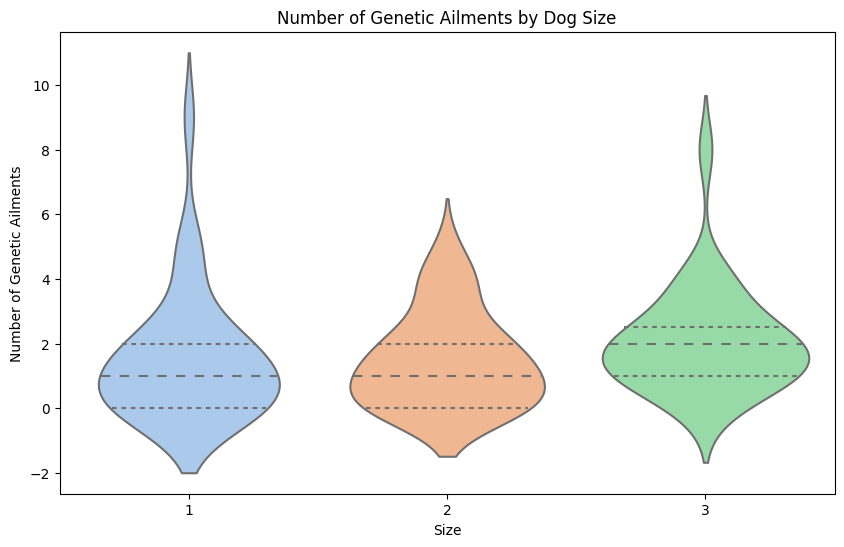

In [8]:
# 5. Number of Genetic Ailments by Dog Size
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='size', y='NUMBER OF GENETIC AILMENTS', inner='quartile', palette='pastel')
plt.title('Number of Genetic Ailments by Dog Size')
plt.xlabel('Size')
plt.ylabel('Number of Genetic Ailments')
plt.show()

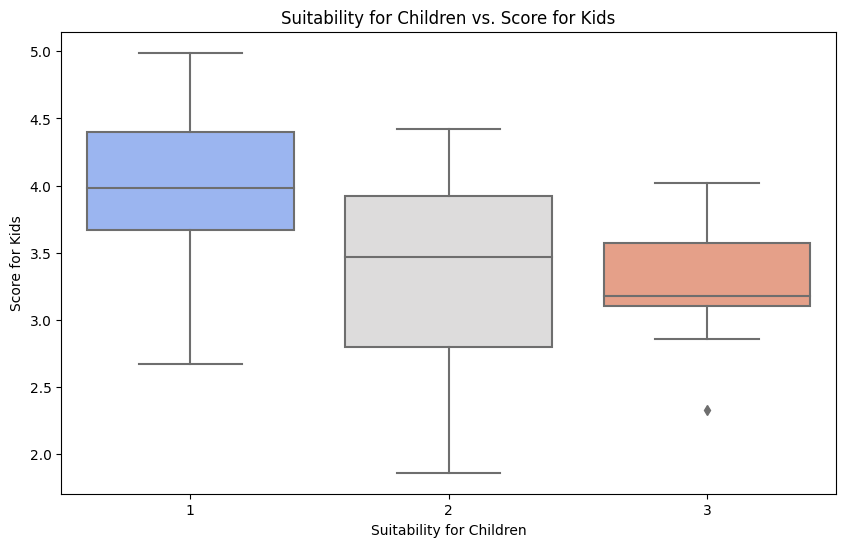

In [9]:
# 6. Suitability for Children vs. Score for Kids
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='SUITABILITY FOR CHILDREN', y='score for kids', palette='coolwarm')
plt.title('Suitability for Children vs. Score for Kids')
plt.xlabel('Suitability for Children')
plt.ylabel('Score for Kids')
plt.show()

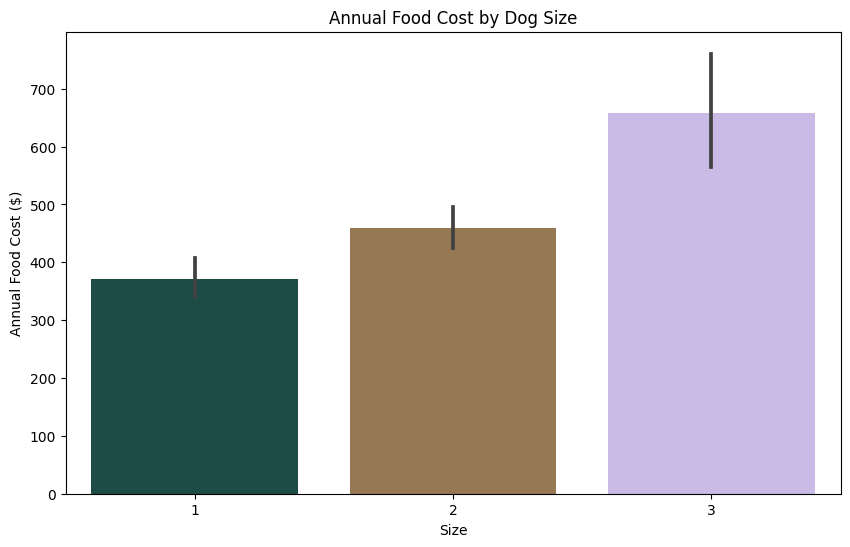

In [10]:
# 7. Annual Food Cost by Dog Size
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='size', y='FOOD COSTS PER YEAR', palette='cubehelix')
plt.title('Annual Food Cost by Dog Size')
plt.xlabel('Size')
plt.ylabel('Annual Food Cost ($)')
plt.show()

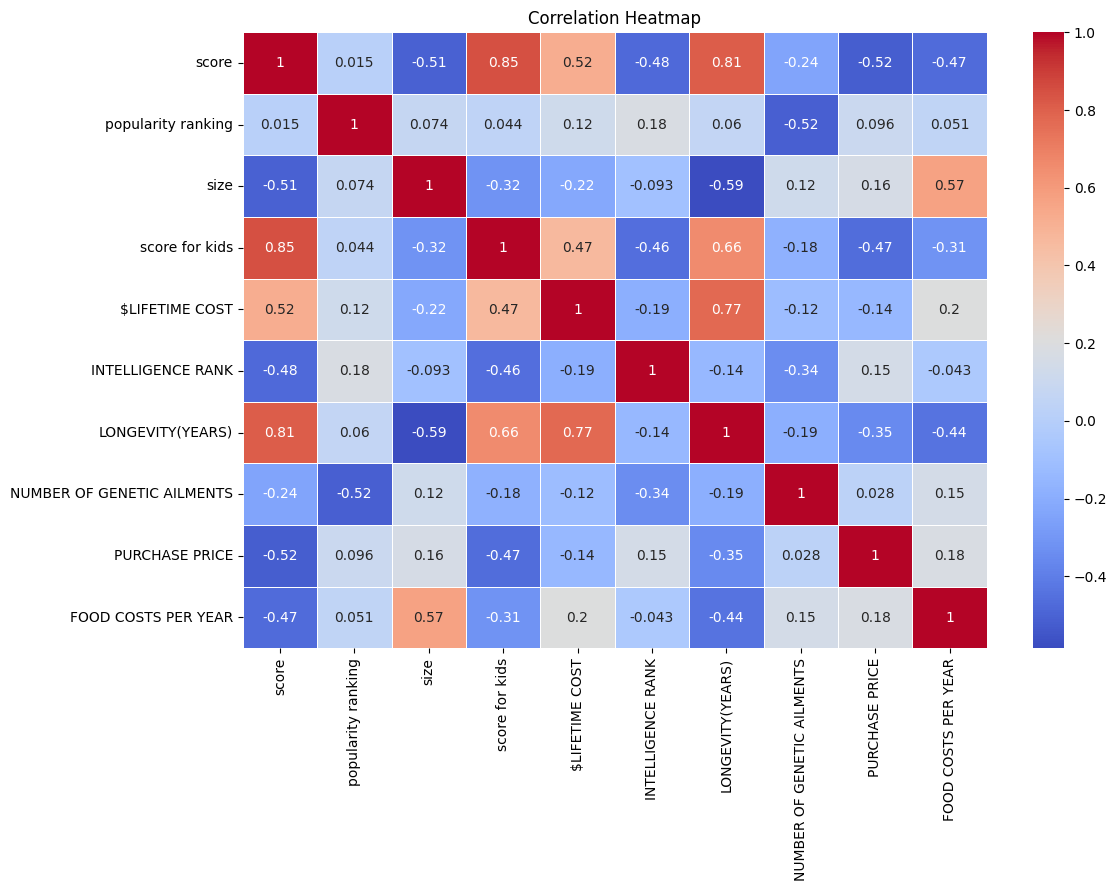

In [11]:
# 8. Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = data[['score', 'popularity ranking', 'size', 'score for kids', '$LIFETIME COST', 'INTELLIGENCE RANK', 'LONGEVITY(YEARS)', 'NUMBER OF GENETIC AILMENTS', 'PURCHASE PRICE', 'FOOD COSTS PER YEAR']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

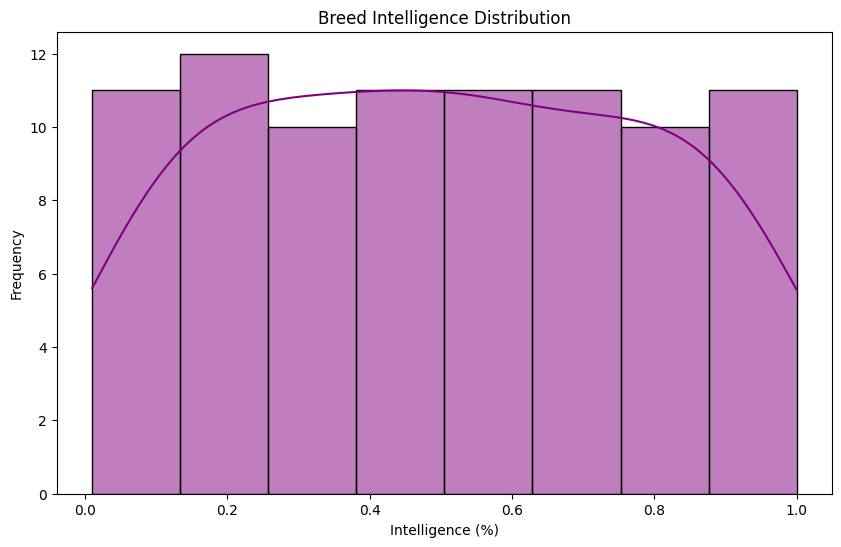

In [12]:
# 9. Breed Intelligence Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='INTELLIGENCE %', kde=True, color='purple')
plt.title('Breed Intelligence Distribution')
plt.xlabel('Intelligence (%)')
plt.ylabel('Frequency')
plt.show()

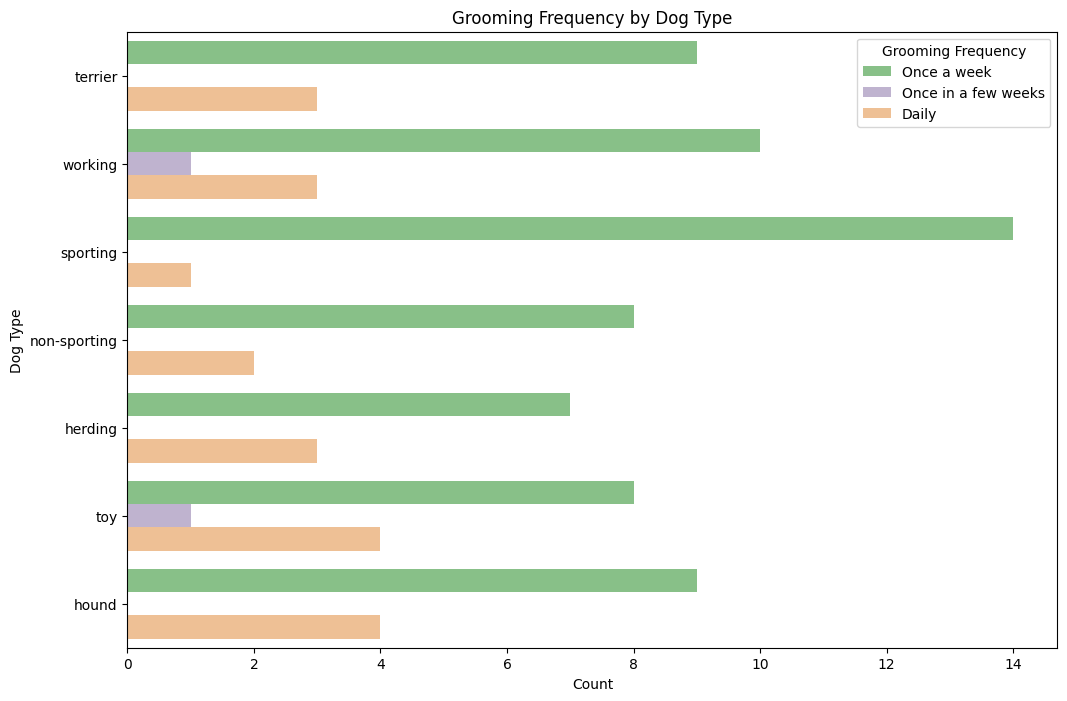

In [13]:
# 10. Grooming Frequency by Dog Type
plt.figure(figsize=(12, 8))
sns.countplot(data=data, y='type', hue='GROOMING FREQUNCY', palette='Accent')
plt.title('Grooming Frequency by Dog Type')
plt.xlabel('Count')
plt.ylabel('Dog Type')
plt.legend(title='Grooming Frequency')
plt.show()